In [19]:
import requests

# Replace 'YOUR_API_KEY' with your actual API key
api_key = '89XK53374PYPGTBEQGQMTLMEY'


In [20]:
import requests

# Construct the API request URL for weather history
location = 'University of Maryland'
start_date = '2020-09-01'
end_date = '2020-12-01'
api_url = f'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}/{start_date}/{end_date}?key={api_key}'

# Function to make API call
def make_api_call(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        return response.json()  # Parse response as JSON
    except requests.exceptions.RequestException as e:
        print("Error making API call:", e)
        return None

# Make the API call to retrieve weather history data
weather_history_data = make_api_call(api_url)




In [21]:
# Print the first few records of the retrieved weather history data
if weather_history_data:
    print("First few records of Weather History Data:")
    for record in weather_history_data['days']:
        print(record)
        break  # Print only the first record to avoid overwhelming the output
else:
    print("No weather history data received.")


First few records of Weather History Data:
{'datetime': '2020-09-01', 'datetimeEpoch': 1598932800, 'tempmax': 80.1, 'tempmin': 67.6, 'temp': 73.0, 'feelslikemax': 82.7, 'feelslikemin': 67.6, 'feelslike': 73.1, 'dew': 67.8, 'humidity': 84.4, 'precip': 0.08, 'precipprob': 100.0, 'precipcover': 8.33, 'preciptype': ['rain'], 'snow': 0.0, 'snowdepth': 0.0, 'windgust': 16.3, 'windspeed': 8.1, 'winddir': 78.4, 'pressure': 1017.7, 'cloudcover': 75.9, 'visibility': 9.8, 'solarradiation': 78.3, 'solarenergy': 6.8, 'uvindex': 4.0, 'sunrise': '06:37:00', 'sunriseEpoch': 1598956620, 'sunset': '19:37:28', 'sunsetEpoch': 1599003448, 'moonphase': 0.48, 'conditions': 'Rain, Partially cloudy', 'description': 'Partly cloudy throughout the day with rain.', 'icon': 'rain', 'stations': ['KDCA', '72405013743', 'PREM2', 'KGAI', 'KADW', '72033493764', 'PWDM2', '74594013705'], 'source': 'obs', 'hours': [{'datetime': '00:00:00', 'datetimeEpoch': 1598932800, 'temp': 67.7, 'feelslike': 67.7, 'humidity': 90.76, 'de

In [22]:
import json

# Define the file path where you want to save the data
file_path = 'weather_history_data.json'

# Save the retrieved weather history data to a JSON file
if weather_history_data:
    with open(file_path, 'w') as json_file:
        json.dump(weather_history_data, json_file)
    print(f"Weather history data saved to {file_path}")
else:
    print("No weather history data received.")



Weather history data saved to weather_history_data.json


In [23]:
import csv
import json

# Load the JSON data from the file
file_path = 'weather_history_data.json'

with open(file_path, 'r') as json_file:
    weather_history_data = json.load(json_file)

# Define the file path for the CSV output
csv_file_path = 'weather_history_data.csv'



In [24]:
import csv

# Extracting days data from the JSON structure
weather_days = weather_history_data["days"]

# Specify the CSV file name
csv_filename = "weather_data.csv"

# Define the headers for the CSV file
headers = ["hours", "windspeed", "temp", "humidity"]

# Open the CSV file in write mode and write the headers
with open(csv_filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(headers)

    # Iterate over each day's data in the JSON structure
    for day_data in weather_days:
        hours_data = day_data["hours"]

        # Iterate over each hour's data in the day
        for hour_data in hours_data:

            hour = int(hour_data["datetime"].split(":")[0])
            windspeed = hour_data["windspeed"]
            temp = hour_data["temp"]
            humid = hour_data["humidity"]

            # Write the data to the CSV file
            writer.writerow([ hour, windspeed, temp, humid])

print(f"CSV file '{csv_filename}' has been created successfully.")

CSV file 'weather_data.csv' has been created successfully.


In [25]:
import pandas as pd

csv_filename = "weather_data.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_filename)

# Convert the DataFrame to a list of dictionaries
weather_data = df.to_dict("records")

# Now, weather_data is a list of dictionaries, where each dictionary represents a row from the CSV file
print(weather_data)


[{'hours': 0, 'windspeed': 6.7, 'temp': 67.7, 'humidity': 90.76}, {'hours': 1, 'windspeed': 7.0, 'temp': 67.6, 'humidity': 92.13}, {'hours': 2, 'windspeed': 6.5, 'temp': 67.6, 'humidity': 90.0}, {'hours': 3, 'windspeed': 7.7, 'temp': 67.7, 'humidity': 90.33}, {'hours': 4, 'windspeed': 5.0, 'temp': 67.9, 'humidity': 90.88}, {'hours': 5, 'windspeed': 5.9, 'temp': 68.0, 'humidity': 91.74}, {'hours': 6, 'windspeed': 5.8, 'temp': 67.9, 'humidity': 93.9}, {'hours': 7, 'windspeed': 4.0, 'temp': 68.3, 'humidity': 94.23}, {'hours': 8, 'windspeed': 5.6, 'temp': 68.9, 'humidity': 93.17}, {'hours': 9, 'windspeed': 5.0, 'temp': 69.3, 'humidity': 94.58}, {'hours': 10, 'windspeed': 4.4, 'temp': 70.8, 'humidity': 94.23}, {'hours': 11, 'windspeed': 3.5, 'temp': 72.5, 'humidity': 90.98}, {'hours': 12, 'windspeed': 5.0, 'temp': 75.6, 'humidity': 85.44}, {'hours': 13, 'windspeed': 5.4, 'temp': 75.7, 'humidity': 82.16}, {'hours': 14, 'windspeed': 7.9, 'temp': 77.7, 'humidity': 77.07}, {'hours': 15, 'windsp

In [26]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Data Transformation for LSTM
def create_lstm_data(weather_data, sequence_length):
    X, y = [], []
    temp_scaler = MinMaxScaler(feature_range=(0, 1))  # Initialize scaler for temperature

    windspeed_data = [item["windspeed"] for item in weather_data]
    temp_data = [item["temp"] for item in weather_data]
    hour_data = [item["hours"] for item in weather_data]
    humidity_data = [item["humidity"] for item in weather_data]

    temp_data_normalized = temp_scaler.fit_transform(np.array(temp_data).reshape(-1, 1))

    for i in range(len(weather_data) - sequence_length):
        windspeed_seq = windspeed_data[i:i + sequence_length]
        temp_seq = temp_data_normalized[i:i + sequence_length]
        humidity_seq = humidity_data[i:i + sequence_length]
        hour_seq = hour_data[i:i + sequence_length]

        seq_y = windspeed_data[i + sequence_length]

        combined_seq = np.column_stack((hour_seq, windspeed_seq, temp_seq, humidity_seq))
        X.append(combined_seq)
        y.append(seq_y)

    train_size = round(len(X) * 0.8)
    val_size = round(len(X) * 0.1)

    X_train = X[:train_size]
    y_train = y[:train_size]

    X_val = X[train_size:train_size + val_size]
    y_val = y[train_size:train_size + val_size]

    X_test = X[train_size + val_size:]
    y_test = y[train_size + val_size:]

    return np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val), np.array(X_test), np.array(y_test)


# Example usage:
sequence_length = 48  # Choose the length of input sequences
X_train, y_train, X_val, y_val, X_test, y_test = create_lstm_data(weather_data, sequence_length)



print("Input train data shape (X):", X_train.shape)  # Shape should be (num_samples, sequence_length, num_features)
print("Output train data shape (y):", y_train.shape)  # Shape should be (num_samples,)
print("Input val data shape (X):", X_val.shape)  # Shape should be (num_samples, sequence_length, num_features)
print("Output val data shape (y):", y_val.shape)  # Shape should be (num_samples,)
print("Input test data shape (X):", X_test.shape)  # Shape should be (num_samples, sequence_length, num_features)
print("Output test data shape (y):", y_test.shape)  # Shape should be (num_samples,)

Input train data shape (X): (1729, 48, 4)
Output train data shape (y): (1729,)
Input val data shape (X): (216, 48, 4)
Output val data shape (y): (216,)
Input test data shape (X): (216, 48, 4)
Output test data shape (y): (216,)


In [27]:
import torch
# Convert the numpy arrays to PyTorch tensors
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert the numpy arrays to PyTorch tensors and move them to the device
X_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
X_val_tensor = torch.from_numpy(X_val).float().to(device)
y_val_tensor = torch.from_numpy(y_val).float().to(device)
X_test_tensor = torch.from_numpy(X_test).float().to(device)
y_test_tensor = torch.from_numpy(y_test).float().to(device)

In [28]:
print(X_train[-1])

[[ 23.           7.4          0.64144737 100.        ]
 [  0.           4.9          0.64967105  99.43      ]
 [  1.           6.4          0.62335526  99.42      ]
 [  2.           6.3          0.60032895 100.        ]
 [  3.           0.           0.61513158  98.07      ]
 [  4.           2.9          0.60690789  98.06      ]
 [  5.           2.8          0.60032895  98.52      ]
 [  6.           7.6          0.57730263  99.69      ]
 [  7.          11.           0.60197368  96.59      ]
 [  8.          10.           0.58223684  96.57      ]
 [  9.          10.1          0.53782895  95.95      ]
 [ 10.          11.2          0.51151316  93.71      ]
 [ 11.          10.4          0.49013158  92.85      ]
 [ 12.          13.8          0.44736842  87.88      ]
 [ 13.          13.           0.4375      78.48      ]
 [ 14.          15.6          0.42434211  76.32      ]
 [ 15.          12.           0.40131579  79.43      ]
 [ 16.          12.5          0.375       85.11      ]
 [ 17.    

In [29]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming X_lstm and y_lstm are your input and output data, as generated in the previous step
# X_lstm shape: (num_samples, sequence_length, num_features)
# y_lstm shape: (num_samples,)
import torch
import torch.nn as nn

# Define the LSTM model class with an additional hidden layer
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward pass through LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Get output from the last time step
        out = self.fc(out[:, -1, :])
        return out



# Define hyperparameters
input_size = 4  # Number of input features (windspeed and temperature)
hidden_size = 255  # Number of LSTM units
output_size = 1  # Output size (single value for predicting windspeed)

# Create an instance of the LSTM model and move it to the device
model = LSTMModel(input_size, hidden_size, output_size).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
# Training the model with early stopping
num_epochs = 150
train_losses, val_losses = [], []
patience = 100  # Number of epochs to wait for improvement
min_delta = 0.1  # Minimum change in loss to be considered as improvement
best_loss = float('inf')  # Initialize best loss with a large value
wait = 0  # Initialize the patience counter

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs.squeeze(), y_val_tensor)
        val_losses.append(val_loss.item())

"""
    if loss.item() + min_delta < best_loss:
        best_loss = loss.item()
        wait = 0  # Reset the patience counter
    else:
        wait += 1
        if wait >= patience:
            print(f'Early stopping at epoch {epoch+1} with loss {loss.item():.4f}')
            break"""


Epoch [10/150], Loss: 15.3255
Epoch [20/150], Loss: 15.4605
Epoch [30/150], Loss: 14.9836
Epoch [40/150], Loss: 13.9535
Epoch [50/150], Loss: 11.6009
Epoch [60/150], Loss: 8.2491
Epoch [70/150], Loss: 6.0953
Epoch [80/150], Loss: 4.9663
Epoch [90/150], Loss: 4.2973
Epoch [100/150], Loss: 4.0821
Epoch [110/150], Loss: 3.7248
Epoch [120/150], Loss: 3.5703
Epoch [130/150], Loss: 3.4574
Epoch [140/150], Loss: 3.3678
Epoch [150/150], Loss: 3.2878


"\n    if loss.item() + min_delta < best_loss:\n        best_loss = loss.item()\n        wait = 0  # Reset the patience counter\n    else:\n        wait += 1\n        if wait >= patience:\n            print(f'Early stopping at epoch {epoch+1} with loss {loss.item():.4f}')\n            break"

In [31]:
# Save the trained model
torch.save(model.state_dict(), 'trained_lstm_model.pt')

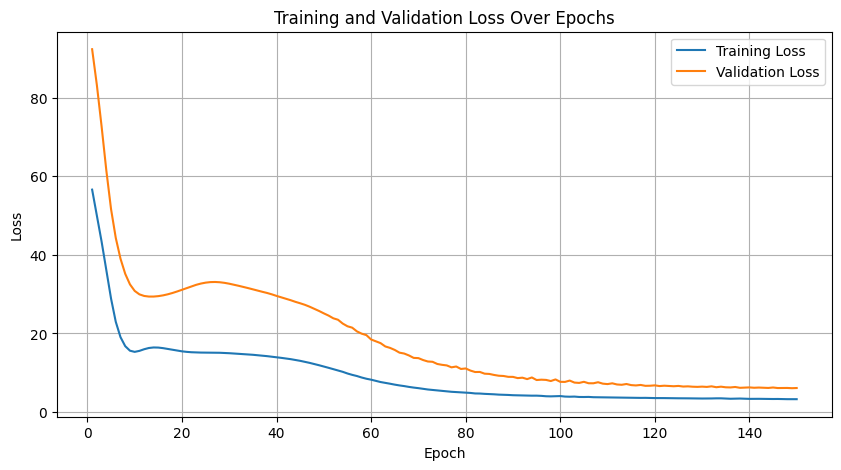

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Save the trained model
torch.save(model.state_dict(), 'trained_lstm_model.pt')


Mean Absolute Error (MAE): 2.08
Mean Squared Error (MSE): 7.03
Root Mean Squared Error (RMSE): 2.65


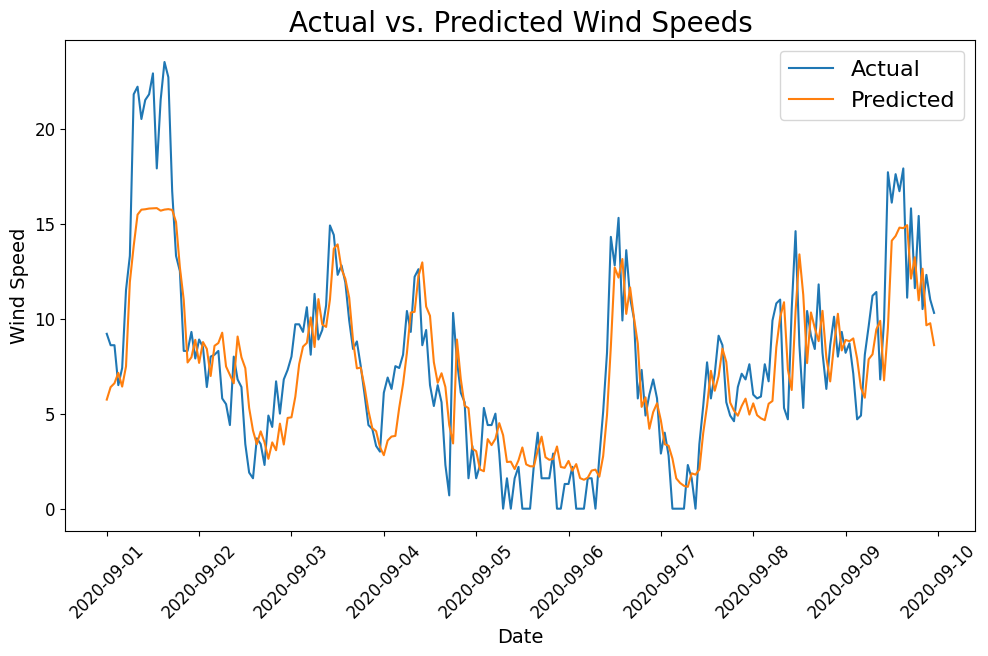

In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime, timedelta

# Testing the model
model = LSTMModel(input_size, hidden_size, output_size).to(device)
model.load_state_dict(torch.load('trained_lstm_model.pt'))
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs.squeeze(), y_test_tensor)
    y_pred = test_outputs.cpu().numpy()  # Move predictions to CPU before converting to numpy

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Generate date labels
start_date = '2020-09-01'
num_points = len(y_test)
date_range = pd.date_range(start=start_date, periods=num_points, freq='H')

# Visualize actual vs. predicted wind speeds
plt.figure(figsize=(10, 6))
plt.plot(date_range, y_test, label='Actual')
plt.plot(date_range, y_pred, label='Predicted')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wind Speed', fontsize=14)
plt.title('Actual vs. Predicted Wind Speeds', fontsize=20)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=16)
plt.show()

In [53]:
with torch.no_grad():
    test_outputs = model(X_test_tensor[1].unsqueeze(0))
    y_pred_2 = test_outputs.cpu().numpy()  # Move predictions to CPU before converting to numpy


In [54]:
   y_pred_2


array([[6.393509]], dtype=float32)

In [50]:

X_test_tensor.shape



torch.Size([216, 48, 4])

In [45]:
type(X_test_tensor[1])

torch.Tensor

In [52]:
X_test_tensor[1].unsqueeze(0).shape

torch.Size([1, 48, 4])

In [49]:
import torch

# Example tensor
a = torch.randn(sequence_length, input_size)

# Nest the tensor by adding a new dimension
b = a.unsqueeze(0)  # Adds a new dimension at the 0-th position

print(b.shape)  # Should print torch.Size([1, sequence_length, input_size])


torch.Size([1, 48, 4])
